In [39]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [40]:
df = pd.read_csv('SUNPHARMA.csv')

df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     528
%Deliverble            528
dtype: int64

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df = df[df['Date']>"2019-01-01"]

In [43]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4730,2019-01-02,SUNPHARMA,EQ,433.55,430.50,441.2,429.25,439.95,440.05,435.70,9656878,4.207479e+14,100434.0,3755920.0,0.3889
4731,2019-01-03,SUNPHARMA,EQ,440.05,442.05,443.6,434.00,434.90,436.10,439.97,9479511,4.170669e+14,112961.0,2912917.0,0.3073
4732,2019-01-04,SUNPHARMA,EQ,436.10,439.10,439.9,432.20,433.40,433.80,435.62,6228693,2.713361e+14,81360.0,1392009.0,0.2235
4733,2019-01-07,SUNPHARMA,EQ,433.80,437.10,438.0,429.30,430.85,430.80,433.19,4118235,1.783964e+14,64152.0,1444774.0,0.3508
4734,2019-01-08,SUNPHARMA,EQ,430.80,433.80,449.0,432.35,448.75,448.05,443.03,12368631,5.479690e+14,153466.0,3819410.0,0.3088


In [44]:
X = df[['Prev Close','Date','High','Low','Open']].values
y = df[['Close']].values

In [45]:
X.shape

(576, 5)

In [46]:
X=X.reshape(-1,5)

In [47]:
print(X.shape)

(576, 5)


In [48]:
print(y.shape)

(576, 1)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
print(X_train)

[[503.65 Timestamp('2020-09-22 00:00:00') 515.0 493.6 509.5]
 [405.35 Timestamp('2019-07-02 00:00:00') 407.0 391.15 404.85]
 [643.65 Timestamp('2021-02-12 00:00:00') 654.4 622.35 654.4]
 ...
 [484.25 Timestamp('2020-06-19 00:00:00') 491.95 485.2 486.8]
 [396.8 Timestamp('2019-10-16 00:00:00') 402.2 394.25 398.05]
 [608.8 Timestamp('2021-04-06 00:00:00') 621.9 603.5 608.75]]


In [51]:
print(X_test)

[[523.45 Timestamp('2020-09-04 00:00:00') 530.4 508.25 518.0]
 [412.95 Timestamp('2019-05-24 00:00:00') 418.0 411.65 416.7]
 [568.7 Timestamp('2020-12-09 00:00:00') 583.95 566.7 571.0]
 [473.4 Timestamp('2020-04-21 00:00:00') 490.7 464.25 467.85]
 [618.95 Timestamp('2021-03-05 00:00:00') 619.45 606.9 619.45]
 [601.45 Timestamp('2021-02-25 00:00:00') 618.9 602.7 606.4]
 [633.25 Timestamp('2021-04-16 00:00:00') 650.0 626.35 633.25]
 [439.75 Timestamp('2019-12-19 00:00:00') 440.6 427.5 439.8]
 [596.25 Timestamp('2021-01-04 00:00:00') 609.45 595.2 600.0]
 [429.8 Timestamp('2019-12-12 00:00:00') 437.9 430.25 430.9]
 [548.25 Timestamp('2020-12-04 00:00:00') 572.9 545.2 550.0]
 [614.2 Timestamp('2021-03-03 00:00:00') 625.4 612.25 616.5]
 [412.0 Timestamp('2019-11-14 00:00:00') 417.35 407.55 413.2]
 [627.15 Timestamp('2021-02-15 00:00:00') 637.3 623.3 632.0]
 [416.8 Timestamp('2019-09-19 00:00:00') 418.9 408.2 416.8]
 [427.8 Timestamp('2019-08-26 00:00:00') 429.8 415.1 428.0]
 [629.2 Timestamp

In [52]:
X_df = pd.DataFrame(X_train, columns=[['Prev Close','Date','High','Low','Open']])
y_df = pd.DataFrame(y_train, columns=['Close'])

In [53]:
print(X_df['Prev Close'])

    Prev Close
0       503.65
1       405.35
2       643.65
3       385.75
4       370.15
..         ...
455     418.95
456     450.85
457     484.25
458      396.8
459      608.8

[460 rows x 1 columns]


In [54]:
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_df[['Prev Close','High','Low','Open']],y_df)

/tmp/ipykernel_9476/391788777.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_df[['Prev Close','High','Low','Open']],y_df)


RandomForestRegressor(random_state=0)

In [55]:
Xtest_df = pd.DataFrame(X_test, columns=[['Prev Close','Date','High','Low','Open']])

In [56]:
y_pred=regressor.predict(Xtest_df[['Prev Close','High','Low','Open']])

In [57]:
y_preddf = pd.DataFrame(y_pred,columns=['Close'])

In [58]:
r2_score(y_test,y_pred)

0.9954986029008797

In [59]:
print(Xtest_df)

    Prev Close       Date    High     Low    Open
0       523.45 2020-09-04   530.4  508.25   518.0
1       412.95 2019-05-24   418.0  411.65   416.7
2        568.7 2020-12-09  583.95   566.7   571.0
3        473.4 2020-04-21   490.7  464.25  467.85
4       618.95 2021-03-05  619.45   606.9  619.45
..         ...        ...     ...     ...     ...
111     409.85 2019-06-03   418.6   407.5   411.0
112     397.85 2020-02-25   402.4   385.3   402.4
113     389.95 2019-06-12   397.0  385.25   391.0
114     541.05 2020-08-12  540.75  529.75  540.75
115     439.15 2019-05-09   442.7  431.55   436.0

[116 rows x 5 columns]


In [60]:
print(y_test)

[[512.45]
 [415.75]
 [569.55]
 [473.15]
 [611.2 ]
 [609.55]
 [646.05]
 [433.6 ]
 [604.4 ]
 [434.15]
 [569.05]
 [624.35]
 [410.2 ]
 [627.5 ]
 [411.15]
 [419.35]
 [631.5 ]
 [482.6 ]
 [443.7 ]
 [521.05]
 [603.45]
 [513.25]
 [605.5 ]
 [464.45]
 [421.95]
 [452.9 ]
 [430.5 ]
 [441.7 ]
 [582.3 ]
 [412.4 ]
 [439.85]
 [482.  ]
 [440.9 ]
 [450.9 ]
 [418.95]
 [426.45]
 [343.55]
 [436.1 ]
 [485.6 ]
 [479.95]
 [433.6 ]
 [513.9 ]
 [543.85]
 [473.1 ]
 [427.8 ]
 [639.95]
 [418.95]
 [433.4 ]
 [412.  ]
 [594.7 ]
 [453.8 ]
 [433.3 ]
 [532.25]
 [623.6 ]
 [575.75]
 [389.95]
 [571.65]
 [408.65]
 [465.6 ]
 [462.35]
 [431.  ]
 [390.75]
 [500.45]
 [394.65]
 [429.8 ]
 [439.75]
 [468.55]
 [411.15]
 [417.55]
 [576.25]
 [485.6 ]
 [564.35]
 [427.9 ]
 [565.2 ]
 [462.45]
 [500.75]
 [422.4 ]
 [430.65]
 [404.95]
 [450.9 ]
 [511.65]
 [604.05]
 [502.2 ]
 [643.4 ]
 [499.7 ]
 [586.95]
 [464.1 ]
 [410.35]
 [379.9 ]
 [644.5 ]
 [436.7 ]
 [409.75]
 [424.55]
 [386.4 ]
 [439.95]
 [454.95]
 [503.15]
 [429.9 ]
 [506.9 ]
 [423.45]


In [61]:
print(y_pred)

[522.512  410.5905 574.8825 474.2135 611.996  616.8215 639.1905 432.6305
 601.4895 433.672  560.1025 615.603  409.9785 631.872  413.4475 420.395
 634.24   478.207  436.58   520.5355 603.184  507.9115 606.172  468.3985
 419.3315 457.411  431.385  447.413  581.053  406.8315 438.8355 478.082
 436.1705 452.5365 419.3105 416.358  346.6895 436.685  488.258  483.5115
 434.3455 512.563  535.256  473.6045 429.72   643.7585 414.72   436.839
 416.0025 600.4125 452.3475 425.4215 531.0245 630.4475 574.079  390.116
 574.0085 405.02   464.7905 456.251  425.1185 404.9755 492.8    394.409
 428.3915 436.3065 466.98   410.6515 419.659  573.6515 473.9395 567.3035
 437.0645 571.567  463.347  508.1085 424.535  431.8675 407.3765 454.943
 514.6285 600.9695 499.4815 642.6125 494.617  593.367  466.8125 418.7475
 380.679  643.885  433.6235 414.2855 425.4085 385.8905 437.7605 454.304
 509.536  433.8305 507.861  424.607  601.381  444.38   528.0595 404.1945
 356.575  448.0675 588.0035 514.2485 349.6    463.06   588

In [62]:
# Xtest_df['Date'] = pd.to_datetime(Xtest_df['Date'])

In [63]:
print(Xtest_df)

    Prev Close       Date    High     Low    Open
0       523.45 2020-09-04   530.4  508.25   518.0
1       412.95 2019-05-24   418.0  411.65   416.7
2        568.7 2020-12-09  583.95   566.7   571.0
3        473.4 2020-04-21   490.7  464.25  467.85
4       618.95 2021-03-05  619.45   606.9  619.45
..         ...        ...     ...     ...     ...
111     409.85 2019-06-03   418.6   407.5   411.0
112     397.85 2020-02-25   402.4   385.3   402.4
113     389.95 2019-06-12   397.0  385.25   391.0
114     541.05 2020-08-12  540.75  529.75  540.75
115     439.15 2019-05-09   442.7  431.55   436.0

[116 rows x 5 columns]


In [64]:
Xtest_df.iloc[:,1:2]

,Date
0,2020-09-04
1,2019-05-24
2,2020-12-09
3,2020-04-21
4,2021-03-05
...,...
111,2019-06-03
112,2020-02-25
113,2019-06-12
114,2020-08-12


In [65]:
X_plot = Xtest_df.iloc[:,1:2]
X_plotdf = pd.DataFrame(X_plot,columns = [('Date',)])

In [66]:
for col in X_plot:
    print(col)

('Date',)


In [67]:
y_testdf = pd.DataFrame(y_test,columns=['Close'])

In [68]:
r2_score(y_test,y_pred)

0.9954986029008797

In [69]:
print(X_plotdf)

          Date
0   2020-09-04
1   2019-05-24
2   2020-12-09
3   2020-04-21
4   2021-03-05
..         ...
111 2019-06-03
112 2020-02-25
113 2019-06-12
114 2020-08-12
115 2019-05-09

[116 rows x 1 columns]


In [70]:

print(X_plotdf.shape)
print(y_testdf.shape)

(116, 1)
(116, 1)


In [71]:
new_df = pd.merge(X_plotdf, y_preddf, left_index=True, right_index=True)

In [72]:
old_df = pd.merge(X_plotdf, y_testdf, left_index=True, right_index=True)

In [73]:
new_df = new_df.rename(columns = {('Date',):'Date'})
old_df = old_df.rename(columns = {('Date',):'Date'})
new_df = new_df.rename(columns={('Close'):'Predicted Price'})
old_df = old_df.rename(columns={('Close'):'Actual Price'})

In [74]:
print(new_df)

          Date  Predicted Price
0   2020-09-04         522.5120
1   2019-05-24         410.5905
2   2020-12-09         574.8825
3   2020-04-21         474.2135
4   2021-03-05         611.9960
..         ...              ...
111 2019-06-03         410.5025
112 2020-02-25         392.6905
113 2019-06-12         391.6025
114 2020-08-12         533.7840
115 2019-05-09         436.1135

[116 rows x 2 columns]


In [75]:
for col in old_df:
    print(col)

Date
Actual Price


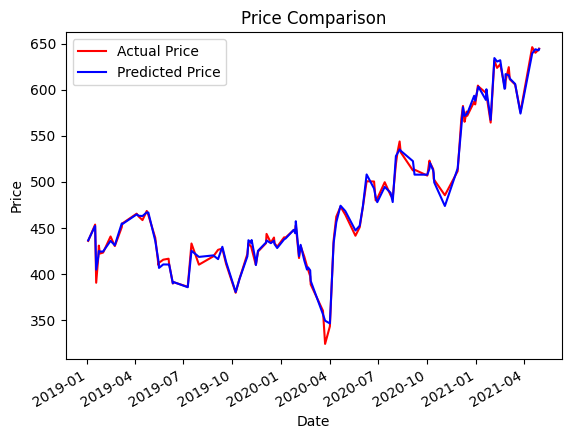

In [76]:
old_df.set_index('Date', inplace=True)
new_df.set_index('Date',inplace=True)
ax = old_df.plot(color='red')
new_df.plot(ax=ax,color='blue')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()